# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations
1) There is a strong correlation between max temperature and latitude in both hemispheres.  That is clearly demonstrated in each of the three charts (all cities, northern hemisphere and southern hemisphere) showing max temperature by latitude.  The correlation in the northern hemisphere is especially strong and has an r-value of -.90.
2) Humidity levels tend to be higher in most cities than the 40-50% humidity that is generally considered comfortable.  There are some lower humidity levels in the northern hemisphere, but it is not clear whether that is because the northern hemisphere has a higher sample size. There is very little correlation between humidity and latitude.  All latitudes seem to have an equal opportunity to suffer from high humidity.
3) Both cloudiness and wind speed have low correlation with latitude.  There is more correlation in the southern hemisphere for both cloudiness and particularly wind speed.  The lower population of southern hemisphere cities in the sample could be a factor.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [46]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
# If the city is unique, then add it to a our cities list    
    if city not in cities:
        cities.append(city)  
# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [47]:
# Base URL for making API calls on openweathermap.org
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
# Use counter to batch requests so as not to exceed request limit
counter = 0
# Use batch counter to reflect pull of new set in print log
batch_counter = 1
# Use record counter to reflect record number of each city in print log
record_counter = 1

# Set maximum number of cities to pull so for loop stops if all required cities are retrieved
max_cities = 550
# Set up empty lists to hold the data contents of the request response
max_temp = []
lat = []
lon = []
humidity = []
cloudy = []
wind_speed = []
city_name = []
country = []
date = []

# Create for loop to loop through all cities found in citipy in the cell above
for city in cities:
# Amend URL to include city to query, incorporate api key and set units to American standards
    query_url = f"{base_url}{city}&appid={weather_api_key}&units=imperial"
# Check to see if we have already reached the max number of cities before continuing    
    if len(city_name) < max_cities:
# Check to make sure we're still within the current batch search limit
        if counter < 50:
# Attempt to request and return data on each city
            try:      
                response = requests.get(query_url)
                response_json = response.json()     
# Check to be sure we haven't already gathered data on this city before continuing
                if city not in city_name:                    
# Append received data to the empty lists set up above the for loop
# Use try and except to keep the loop moving on several data points
                    city_name.append(response_json["name"])
                    country.append(response_json["sys"]["country"])
                    lat.append(response_json["coord"]["lat"])
                    lon.append(response_json["coord"]["lon"])  
                    date.append(response_json["dt"])
                    try:
                        max_temp.append(response_json["main"]["temp_max"])
                    except:
                        print("This {city} has no information on temperature")
                        pass
                    try:
                        humidity.append(response_json["main"]["humidity"])
                    except:
                        print("This {city} has no information on humidity")
                        pass
                    try:
                        cloudy.append(response_json['clouds']["all"])
                    except:
                        print("This {city} has no information on cloudiness")
                        pass                        
                    try:
                        wind_speed.append(response_json["wind"]["speed"])
                    except:
                        print("This {city} has no information on wind speed")
                        pass 
# Begin printing log of record processing
                print(f"Processing Record {record_counter} for Set{batch_counter}:|{city}")
# Update counter for the next record
                counter += 1
# Update record counter for the next record
                record_counter += 1
# If city is not found, print message that city will be skipped and move to the next city
            except:
                print(f"City not found....skipping")
                pass
# If we have reached the counter limit of 50, start a new batch, update the batch counter for the next batch
# Implement timer after previous batch for one minute break between batches
        else:
            counter = 0
            batch_counter += 1
            time.sleep(60)

Processing Record 1 for Set1:|verkh-chebula
Processing Record 2 for Set1:|nanortalik
Processing Record 3 for Set1:|cabo san lucas
Processing Record 4 for Set1:|saraipali
Processing Record 5 for Set1:|te anau
City not found....skipping
Processing Record 6 for Set1:|hamada
Processing Record 7 for Set1:|saint george
Processing Record 8 for Set1:|rikitea
Processing Record 9 for Set1:|atuona
Processing Record 10 for Set1:|castro
Processing Record 11 for Set1:|puerto ayora
Processing Record 12 for Set1:|georgetown
Processing Record 13 for Set1:|ancud
Processing Record 14 for Set1:|lorengau
Processing Record 15 for Set1:|esperance
Processing Record 16 for Set1:|vung tau
City not found....skipping
Processing Record 17 for Set1:|veraval
Processing Record 18 for Set1:|hilo
Processing Record 19 for Set1:|mount gambier
Processing Record 20 for Set1:|busselton
Processing Record 21 for Set1:|sayaxche
Processing Record 22 for Set1:|bredasdorp
Processing Record 23 for Set1:|bousso
Processing Record 24

Processing Record 188 for Set4:|uman
Processing Record 189 for Set4:|victoria
Processing Record 190 for Set4:|auki
Processing Record 191 for Set4:|vadso
Processing Record 192 for Set4:|winslow
Processing Record 193 for Set4:|thinadhoo
Processing Record 194 for Set4:|peniche
Processing Record 195 for Set4:|butaritari
City not found....skipping
Processing Record 196 for Set4:|takoradi
Processing Record 197 for Set4:|bend
Processing Record 198 for Set4:|comodoro rivadavia
Processing Record 199 for Set4:|kem
City not found....skipping
Processing Record 200 for Set4:|ambon
Processing Record 201 for Set5:|semnan
City not found....skipping
Processing Record 202 for Set5:|husavik
Processing Record 203 for Set5:|homer
Processing Record 204 for Set5:|wanning
Processing Record 205 for Set5:|darlowo
Processing Record 206 for Set5:|upata
Processing Record 207 for Set5:|benguela
Processing Record 208 for Set5:|namikupa
Processing Record 209 for Set5:|kumo
Processing Record 210 for Set5:|lavrentiya
C

Processing Record 371 for Set8:|campoverde
City not found....skipping
Processing Record 372 for Set8:|severo-kurilsk
Processing Record 373 for Set8:|riviere-au-renard
Processing Record 374 for Set8:|vrangel
Processing Record 375 for Set8:|isla vista
Processing Record 376 for Set8:|bartica
Processing Record 377 for Set8:|brae
Processing Record 378 for Set8:|hamilton
Processing Record 379 for Set8:|manitowoc
Processing Record 380 for Set8:|san patricio
Processing Record 381 for Set8:|souillac
Processing Record 382 for Set8:|broken hill
Processing Record 383 for Set8:|los andes
Processing Record 384 for Set8:|ullapool
Processing Record 385 for Set8:|san cristobal
Processing Record 386 for Set8:|limbe
Processing Record 387 for Set8:|emerald
Processing Record 388 for Set8:|bose
Processing Record 389 for Set8:|fort nelson
Processing Record 390 for Set8:|nannilam
Processing Record 391 for Set8:|sonoita
Processing Record 392 for Set8:|cananea
Processing Record 393 for Set8:|pontes e lacerda
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
# Create data frame for all city data collected
city_group = {"City":city_name,
             "Lat":lat,
             "Lng":lon,
             "Max Temp": max_temp,
             "Humidity": humidity,
             "Cloudiness": cloudy,
             "Wind Speed": wind_speed,
             "Country": country,
             "Date": date}

city_df = pd.DataFrame(city_group)
# Send dataframe output to csv file.
city_df.to_csv(output_data_file)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Verkh-Chebula,56.0308,87.6218,40.64,85,85,8.46,RU,1619654478
1,Nanortalik,60.1432,-45.2371,35.40,93,78,4.45,GL,1619654230
2,Cabo San Lucas,22.8909,-109.9124,75.00,68,40,10.36,MX,1619654217
3,Saraipali,21.3333,83.0000,81.57,11,63,2.82,IN,1619654479
4,Te Anau,-45.4167,167.7167,53.10,90,100,5.93,NZ,1619654479


In [51]:
# Display dataframe statistical data
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.646852,15.914985,61.067891,71.692727,54.756364,6.882000,1.619655e+09
std,33.859212,89.990518,18.805071,21.158052,37.367065,4.408533,2.505741e+02
min,-54.800000,-179.166700,14.180000,8.000000,0.000000,0.340000,1.619654e+09
25%,-8.886850,-62.847250,46.990000,63.000000,20.000000,3.745000,1.619655e+09
50%,22.937100,19.903500,64.400000,78.000000,63.500000,5.860000,1.619655e+09
75%,49.395400,95.926925,77.000000,87.000000,90.000000,8.950000,1.619655e+09
max,78.218600,179.316700,98.690000,100.000000,100.000000,28.770000,1.619655e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [52]:
# Locate any cities with humidity in excess of 100
high_humidity = city_df.loc[city_df["Humidity"] > 100,:]    
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [53]:
#  Get the indices of cities that have humidity over 100%.
high_humidity.index

Int64Index([], dtype='int64')

In [54]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_df.drop(city_df[city_df['Humidity'] > 100].index, inplace = False)
clean_city_df = clean_city_df.reset_index(drop = True)
clean_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Verkh-Chebula,56.0308,87.6218,40.64,85,85,8.46,RU,1619654478
1,Nanortalik,60.1432,-45.2371,35.40,93,78,4.45,GL,1619654230
2,Cabo San Lucas,22.8909,-109.9124,75.00,68,40,10.36,MX,1619654217
3,Saraipali,21.3333,83.0000,81.57,11,63,2.82,IN,1619654479
4,Te Anau,-45.4167,167.7167,53.10,90,100,5.93,NZ,1619654479


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

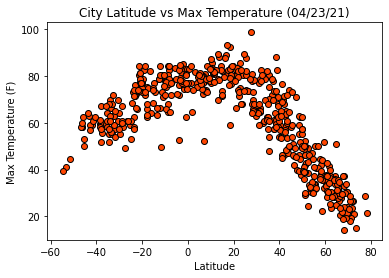

In [60]:
x_axis = clean_city_df["Lat"]
y_axis = clean_city_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker = "o", color = "orangered", edgecolor = "black")
plt.title("City Latitude vs Max Temperature (04/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/City Latitude vs Max Temperature.png")
plt.show()

This plot shows the spread of max temperatures of the random cites selected across latitude.  You can see that max temperatures rise upon approaching the equator.  Interestingly, temperatures peak just north of the equator, rather than right on the equator.

## Latitude vs. Humidity Plot

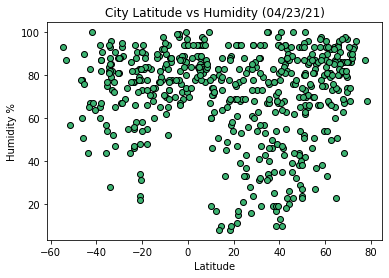

In [61]:
x_axis = clean_city_df["Lat"]
y_axis = clean_city_df["Humidity"]
plt.scatter(x_axis, y_axis, marker = "o", color = "mediumseagreen", edgecolor = "black")
plt.title("City Latitude vs Humidity (04/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.savefig("output_data/City Latitude vs Humidity.png")
plt.show()

The plot above looks at humidity levels relative to latitude across the randomly selected cities.  The chart shows the majority of cities have humidity levels above 60% and those high humidity levels are spread broadly across latitudes. The northern hemisphere appears to have more cities with low humidity, but that may not be an accurate reflection since the sample has a higher percentage of cities in the northern hemisphere.

## Latitude vs. Cloudiness Plot

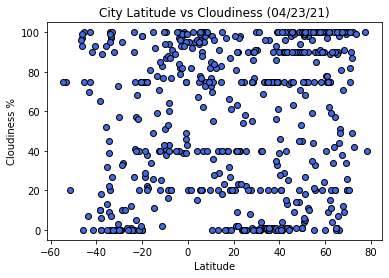

In [62]:
x_axis = clean_city_df["Lat"]
y_axis = clean_city_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker = "o", color = "royalblue", edgecolor = "black")
plt.title("City Latitude vs Cloudiness (04/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.savefig("output_data/City Latitude vs Cloudiness.png")
plt.show()

This graph shows the level of cloudiness across latitudes.  Cloudiness seems to be widely distributed across all latitudes.  Though there is a cluster of around 100% cloudiness at the equator, there are also other clusters around other latitudes.  It does not seem that cloudiness is impacted by latitude.  

## Latitude vs. Wind Speed Plot

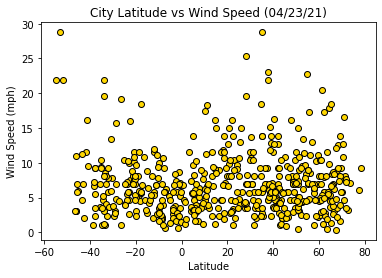

In [63]:
x_axis = clean_city_df["Lat"]
y_axis = clean_city_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker = "o", color = "gold", edgecolor = "black")
plt.title("City Latitude vs Wind Speed (04/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/City Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

The chart above shows the wind speed versus latitude for the cities sample.  Wind speed generally seems to be at 10 mph or lower and doesn't seem to be impacted by latitude at all.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8985847042080516.


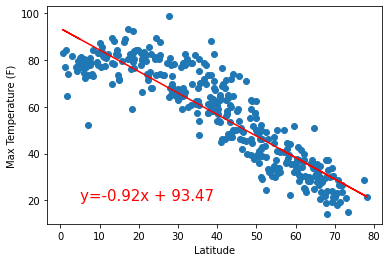

In [65]:
north_cities = clean_city_df.loc[clean_city_df["Lat"]>= 0,:]
x_axis = north_cities["Lat"]
y_axis = north_cities["Max Temp"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(5,20),fontsize=15, color="red")
print(f"The r-value is {rvalue}.")
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

This plot looks again at max temperature vs latitude, but only for those cities within the northern hemisphere.  Given the scatter visual and slope, it is clear there is a strong negative correlation between the temperature and latitude.  This is supported by an r-value of almost -.90.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.736998761074464.


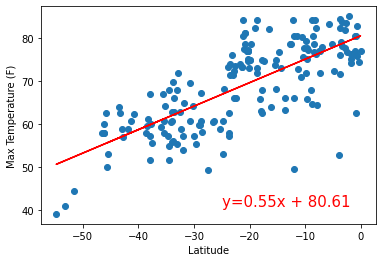

In [67]:
south_cities = clean_city_df.loc[clean_city_df["Lat"]< 0,:]
x_axis = south_cities["Lat"]
y_axis = south_cities["Max Temp"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(-25,41),fontsize=15, color="red")
print(f"The r-value is {rvalue}.")
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

This plot looks again at max temperature vs latitude, but only for those cities within the southern hemisphere. While the slope and clustering show less correlation between temperature and latitude than it did in the northern hemisphere cities, there is still a good positive correlation between them. This is supported by the r-value of .74.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.09903604833517535.


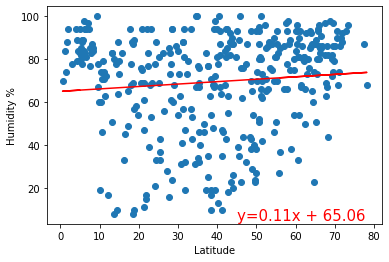

In [68]:
x_axis = north_cities["Lat"]
y_axis = north_cities["Humidity"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(45,5),fontsize=15, color="red")
print(f"The r-value is {rvalue}.")
plt.savefig("output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")
plt.show()

In looking at humidity levels across the northern hemisphere, we see no real correlation between the latitude and humidity.  The r-value is very low at .10.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.18769601030864969.


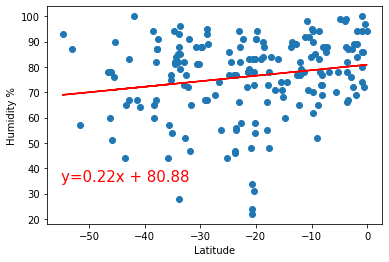

In [69]:
x_axis = south_cities["Lat"]
y_axis = south_cities["Humidity"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(-55,35),fontsize=15, color="red")
print(f"The r-value is {rvalue}.")
plt.savefig("output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")
plt.show()

While the correlation is slightly higher between latitude and humidity in the southern hemisphere, the correlation is still weak, with an r-value of only .19.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.07283077497945278.


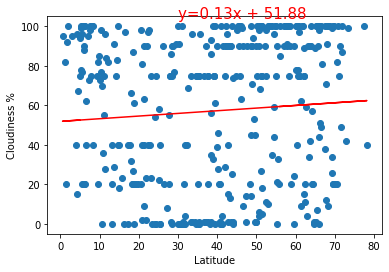

In [88]:
x_axis = north_cities["Lat"]
y_axis = north_cities["Cloudiness"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(30,104),fontsize=15, color="red")
print(f"The r-value is {rvalue}.")
plt.savefig("output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
plt.show()

As seen in the chart of all cities measure of cloudiness versus latitude, there is virtually no correlation between the two in the northern hemisphere.  The r-value is only .07.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2040124931248949.


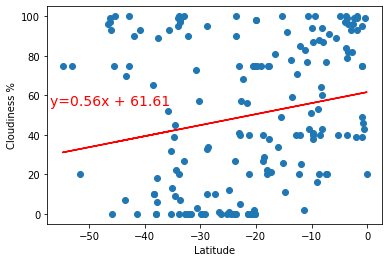

In [72]:
x_axis = south_cities["Lat"]
y_axis = south_cities["Cloudiness"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(-57,55),fontsize=14, color="red")
print(f"The r-value is {rvalue}.")
plt.savefig("output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
plt.show()

When looking at latitude versus cloudiness across the southern hemisphere, there is a slightly higher correlation between them than in the northern hemisphere.  With an r-value of .20, the correlation is still rather weak.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.01899800310022411.


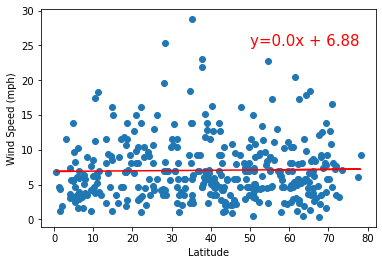

In [76]:
x_axis = north_cities["Lat"]
y_axis = north_cities["Wind Speed"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(50,25),fontsize=15, color="red")
print(f"The r-value is {rvalue}.")
plt.savefig("output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.show()

There is virtually no correlation between the wind speed and latitude in the northern hemisphere.  The r-value is a scant .02.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.3229912979775149.


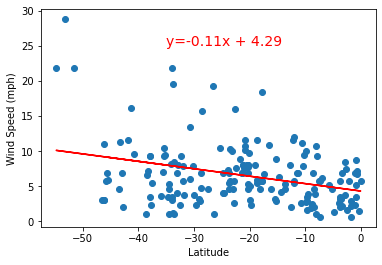

In [78]:
x_axis = south_cities["Lat"]
y_axis = south_cities["Wind Speed"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(-35,25),fontsize=14,color="red")
print(f"The r-value is {rvalue}.")
plt.savefig("output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.show()

Unlike the northern hemisphere, there is a some negative correlation between wind speed and latitude supported by the r-value of -.32